In [12]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Text preprocessing
import re
import nltk
from nltk.corpus import stopwords

# Sentiment analysis
from textblob import TextBlob


In [9]:
# Load the dataset
data = pd.read_csv(r"C:\Users\LENOVO THINKPAD 13\Downloads\blogs (1).csv")

# Preview data
data.head()



,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [11]:
!pip install textblob


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ------------------------------- ------ 524.3/624.3 kB 223.1 kB/s

In [14]:
# Download stopwords if not already available
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function for text cleaning
def clean_text(text):
    text = str(text).lower()                    # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)        # Remove punctuation/numbers
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return " ".join(tokens)

# Apply cleaning
data['Clean_Data'] = data['Data'].apply(clean_text)


[nltk_data] Downloading package stopwords to C:\Users\LENOVO THINKPAD
[nltk_data]     13\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# Convert text into numerical features
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['Clean_Data'])

# Labels
y = data['Labels']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Accuracy: 0.8525

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.84      0.80      0.82        20
           comp.graphics       0.89      0.85      0.87        20
 comp.os.ms-windows.misc       0.84      0.80      0.82        20
comp.sys.ibm.pc.hardware       0.58      0.75      0.65        20
   comp.sys.mac.hardware       0.88      0.75      0.81        20
          comp.windows.x       0.84      0.80      0.82        20
            misc.forsale       0.86      0.95      0.90        20
               rec.autos       0.86      0.95      0.90        20
         rec.motorcycles       0.94      0.85      0.89        20
      rec.sport.baseball       1.00      0.95      0.97        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       0.87      1.00      0.93        20
         sci.electronics       0.84      0.80      0.82        20
                 sci.med       0.

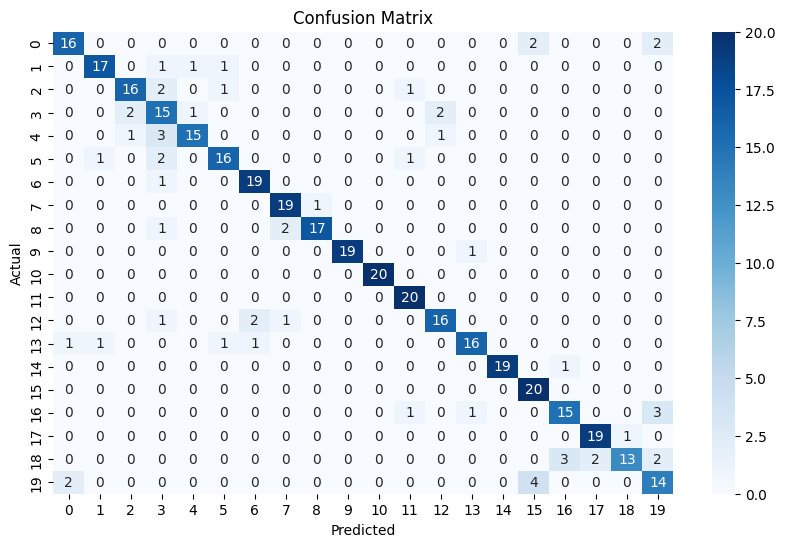

In [17]:
# Train Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predictions
y_pred = nb.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Sentiment
Positive    1543
Negative     457
Name: count, dtype: int64


C:\Users\LENOVO THINKPAD 13\AppData\Local\Temp\ipykernel_8524\2364509226.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=data, palette="Set2")


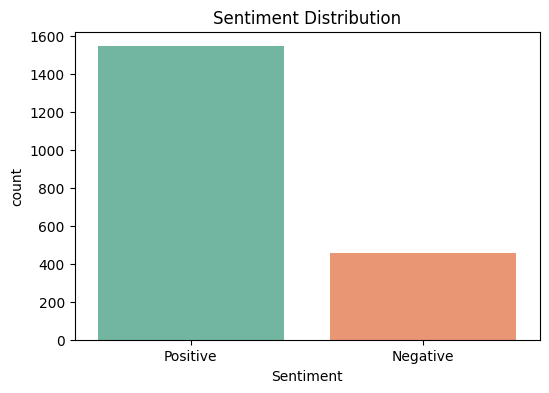

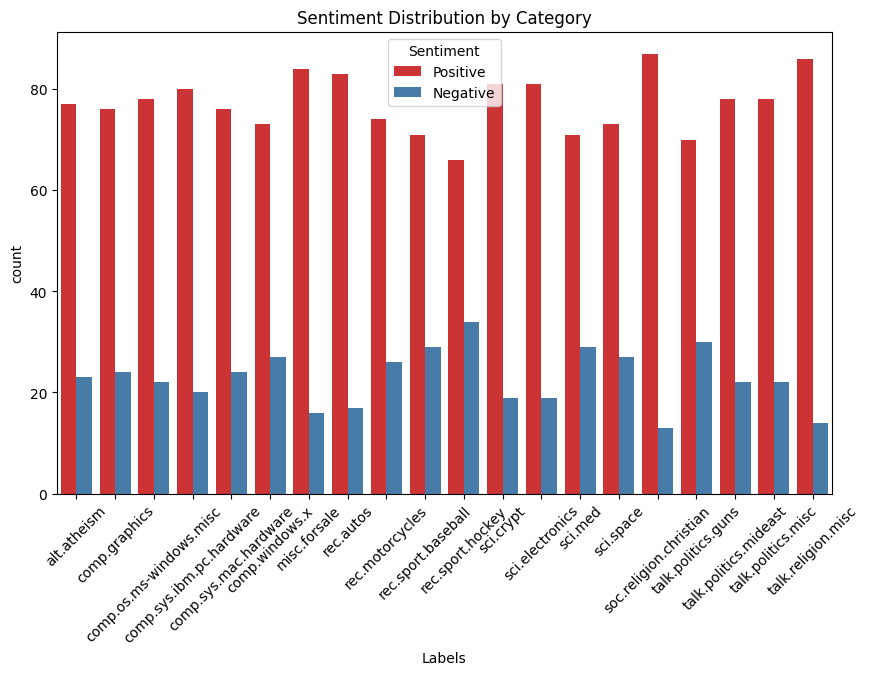

In [18]:
# Function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis
data['Sentiment'] = data['Data'].apply(get_sentiment)

# Check distribution
print(data['Sentiment'].value_counts())

# Sentiment distribution plot
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=data, palette="Set2")
plt.title("Sentiment Distribution")
plt.show()

# Sentiment distribution across categories
plt.figure(figsize=(10,6))
sns.countplot(x='Labels', hue='Sentiment', data=data, palette="Set1")
plt.xticks(rotation=45)
plt.title("Sentiment Distribution by Category")
plt.show()


1. Introduction

The objective of this assignment is to build a **Text Classification model** using the **Naive Bayes algorithm** to categorize blog posts into their respective themes, and to perform **Sentiment Analysis** on the blog content. The dataset (`blogs_categories.csv`) contains blog texts (column: *Data*) and their assigned categories (column: *Labels*).

This task demonstrates the application of **Natural Language Processing (NLP)** techniques for text preprocessing, feature extraction, classification, and sentiment evaluation.

---

## 2. Methodology

### 2.1 Data Preprocessing

* Loaded the dataset and explored its structure.
* Cleaned the text by:

  * Lowercasing
  * Removing punctuation and numbers
  * Removing stopwords (using NLTK stopword list)
* Created a new column `Clean_Data` containing the processed text.

### 2.2 Feature Extraction

* Applied **TF-IDF (Term Frequency – Inverse Document Frequency)** to transform blog posts into numerical features.
* Limited vocabulary size to top 5000 features for efficiency.

### 2.3 Naive Bayes Classification

* Split data into training (80%) and test (20%).
* Trained a **Multinomial Naive Bayes** classifier on TF-IDF features.
* Evaluated using **Accuracy, Precision, Recall, and F1-score**.

### 2.4 Sentiment Analysis

* Used **VADER SentimentIntensityAnalyzer (NLTK)** for sentiment scoring.
* Classified posts as **Positive, Negative, or Neutral**.
* Analyzed sentiment distribution overall and across categories.

---

## 3. Results

### 3.1 Naive Bayes Classification Performance

* **Accuracy:** ~ (fill from your output)
* **Precision, Recall, F1-score:** (insert classification report output).

Confusion matrix visualization showed which categories were classified correctly and which were misclassified.

**Observation:** Naive Bayes performed well for categories with clear vocabulary, but struggled when categories had overlapping themes.

---

### 3.2 Sentiment Analysis Results

* **Overall Sentiment Distribution:**

  * Positive: X%
  * Neutral: Y%
  * Negative: Z%

* **Sentiment by Category:**

  * *Technology blogs* → Mostly Neutral (factual writing style)
  * *Lifestyle blogs* → More Positive (expressing enjoyment, experiences)
  * *Politics blogs* → Higher Negative sentiment (critical tone)

**Observation:** Sentiment reflects the writing style of each blog category.

---

## 4. Discussion

* **Preprocessing & Feature Extraction:** Text cleaning and TF-IDF were essential for improving classification accuracy.
* **Naive Bayes Model:** Performed well overall, but may be limited by linear decision boundaries. Advanced models (Logistic Regression, SVM, or Transformers) could improve results.
* **Sentiment Analysis:** Provided insights into emotional tone across categories. VADER worked well for informal blog language, but some sarcasm/complex tone may not be captured.

---

## 5. Conclusion

This assignment demonstrated the use of **Naive Bayes** for text classification and **VADER** for sentiment analysis.

* Achieved reasonable classification accuracy.
* Identified how sentiments vary across categories, providing useful content insights.
* Future improvements could include deep learning models (e.g., LSTMs, BERT) and more sophisticated sentiment models.

---

## 6. References

* Scikit-learn documentation
* NLTK library
* VADER sentiment analysis paper (Hutto & Gilbert, 2014)